In [40]:
import pandas as pd
import lightkurve as lk 
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from astropy import units as u

%run pipeline.ipynb

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [12]:
dtypes={'pop_id':'Int64','TIC':'string','gaiadr3_source_id':'string','epic_id':'string'}
lctable=pd.read_csv('lcscoresreformat.csv',dtype=dtypes)
lctable.head(5)

,pop_id,lcname,idtype,ID,secorcamp,LC_author,cadence,fluxamplitude,TIC,gaiadr3_source_id,epic_id,per,group,age_Myr,disco_paper,paper_author,year,Score,Flare,Shelf,Evolution,Notes,per_col
0,0,EPIC-246676629-13-EVEREST-1800,EPIC,246676629,13,EVEREST,1800,0.075449,59129133,3392549449695395968,246676629,0.6253,Taurus,2.0,Stauffer_2018,Stauffer,2018,2,0,0,1,NaN,one
1,0,TIC-59129133-5-FFI-30min,TIC,59129133,5,FFI,30min,0.041935,59129133,3392549449695395968,246676629,0.6253,Taurus,2.0,Stauffer_2018,Stauffer,2018,2,1,0,1,NaN,one
2,0,TIC-59129133-32-FFI-10min,TIC,59129133,32,FFI,10min,0.053793,59129133,3392549449695395968,246676629,0.6253,Taurus,2.0,Stauffer_2018,Stauffer,2018,2,0,0,1,NaN,one
3,0,TIC-59129133-43-SPOC-120,TIC,59129133,43,SPOC,120,0.053993,59129133,3392549449695395968,246676629,0.6253,Taurus,2.0,Stauffer_2018,Stauffer,2018,2,2,1,1,NaN,one
4,0,TIC-59129133-44-SPOC-120,TIC,59129133,44,SPOC,120,0.056758,59129133,3392549449695395968,246676629,0.6253,Taurus,2.0,Stauffer_2018,Stauffer,2018,2,2,0,1,NaN,one


In [15]:
lctable[lctable.pop_id==28]

,pop_id,lcname,idtype,ID,secorcamp,LC_author,cadence,fluxamplitude,TIC,gaiadr3_source_id,epic_id,per,group,age_Myr,disco_paper,paper_author,year,Score,Flare,Shelf,Evolution,Notes,per_col
83,28,TIC-435899024-11-FFI-30min,TIC,435899024,11,FFI,30min,0.040002,435899024,5861945711251717888,<NA>,0.3634,UCL/LCC,16.0,Stauffer_2021,Stauffer,2021,2,0,0,0,NaN,one
84,28,TIC-435899024-38-FFI-10min,TIC,435899024,38,FFI,10min,0.035268,435899024,5861945711251717888,<NA>,0.3634,UCL/LCC,16.0,Stauffer_2021,Stauffer,2021,2,0,1,1,NaN,one
85,28,TIC-435899024-64-SPOC-120,TIC,435899024,64,SPOC,120,0.225519,435899024,5861945711251717888,<NA>,0.3634,UCL/LCC,16.0,Stauffer_2021,Stauffer,2021,2,2,1,1,Crazy flare and huge shelf,one
86,28,TIC-435899024-65-SPOC-120,TIC,435899024,65,SPOC,120,0.174696,435899024,5861945711251717888,<NA>,0.3634,UCL/LCC,16.0,Stauffer_2021,Stauffer,2021,2,1,0,1,NaN,one


In [18]:
lc64=get_lc_string('TIC-435899024-64-SPOC-120')

In [42]:
per64=u.Quantity(lctable[lctable.pop_id==28].per.iloc[0],u.d)
per64

<Quantity 0.3634 d>

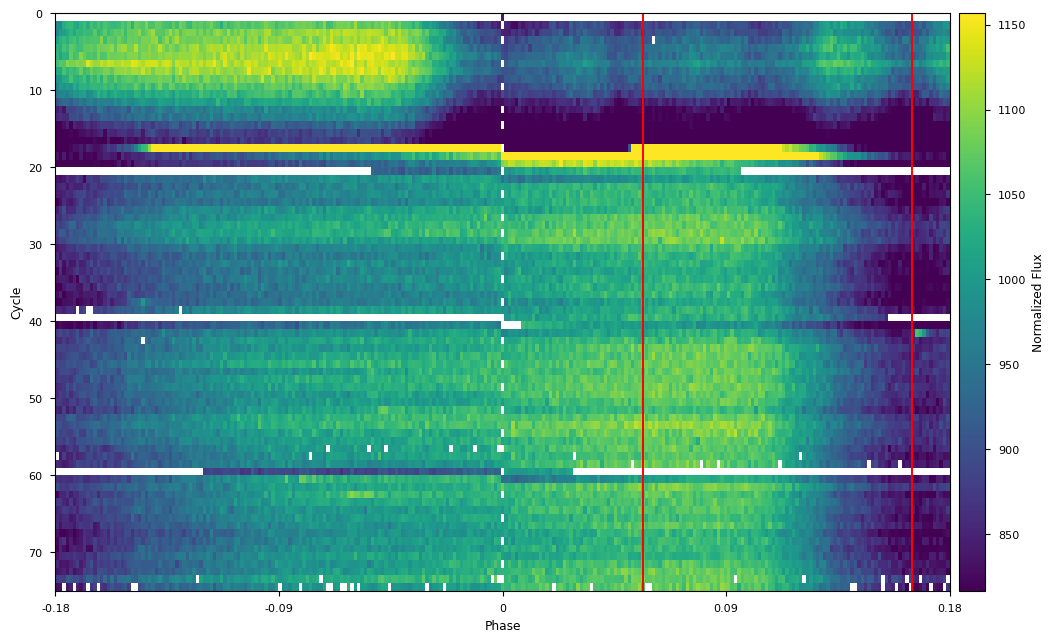

In [44]:
subgraph_rp(lc64,period=per64)

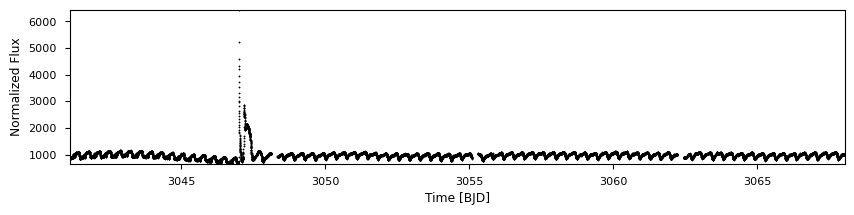

In [47]:
subgraph_fulllc(lc64)

In [49]:
#flare looks like it is between BJD 3047-48 ish. need to find exactly where it starts and stops to cut it out.

In [84]:
len(lc64)

18854

In [94]:
# Compute the 95th percentile of the flux distribution
#since the subgraph_rp method stops the color bar at 5 and 95 percentiles
threshold = np.percentile(lc64['flux'], 98)

# Select rows with flux in the top 5%
top_flux_rows = lc64[lc64['flux'] >= threshold]

In [98]:
len(top_flux_rows)

378

In [104]:
#better method... just plot and narrow the x axis iteratively

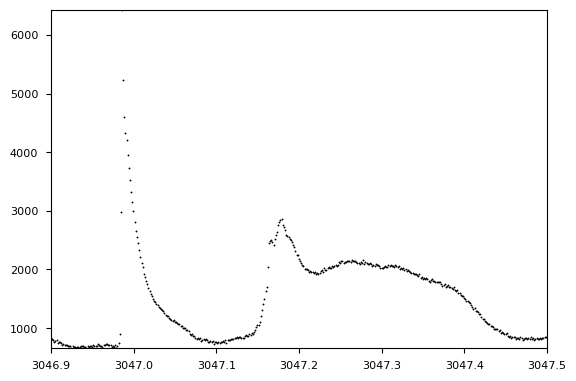

In [119]:
plt.close()
plt.scatter(lc64["time"].value, lc64["flux"], 1, "#000000", alpha=1)
plt.margins(0)
plt.xlim([3046.9,3047.5])
plt.show()

In [125]:
lc64h1=lc64[lc64.time.value<3046.9]

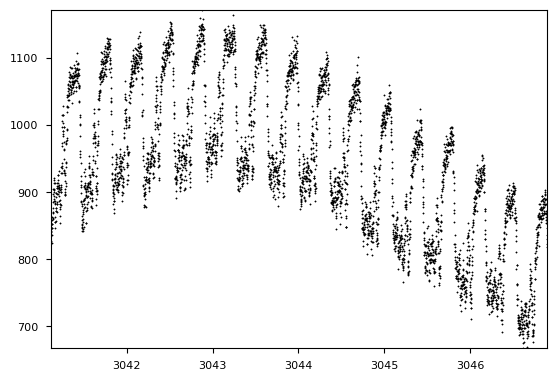

In [127]:
plt.close()
plt.scatter(lc64h1["time"].value, lc64h1["flux"], 1, "#000000", alpha=1)
plt.margins(0)
plt.show()

In [129]:
lc64h2=lc64[lc64.time.value>3047.5]

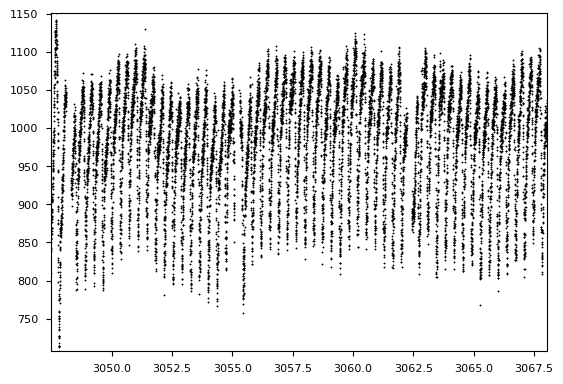

In [131]:
plt.close()
plt.scatter(lc64h2["time"].value, lc64h2["flux"], 1, "#000000", alpha=1)
plt.margins(0)
plt.show()

In [137]:
bin64=u.Quantity(per64/200,u.s)

In [145]:
epoch64=lc64.time[0]

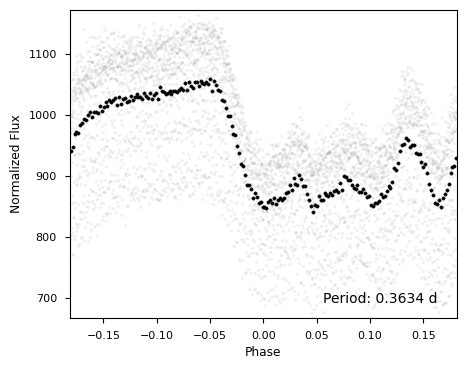

In [147]:
subgraph_phaselc(lc64h1,period=per64,bintime=bin64,epoch_time=epoch64)

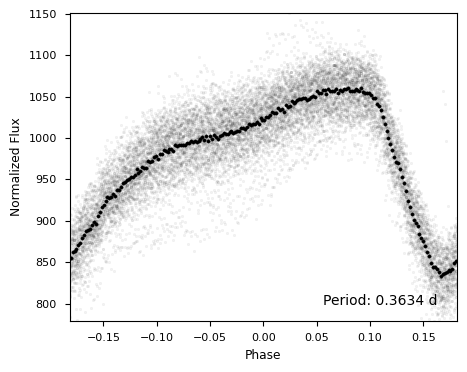

In [149]:
subgraph_phaselc(lc64h2,period=per64,bintime=bin64,epoch_time=epoch64)